In [1]:

import numpy as np

from DataAnalysisClass import *
from clustering_work import *

single = ['aug-cc-pVDZ', 'aug-cc-pVTZ', 'aug-cc-pVQZ', 'aug-cc-pV5Z', 'aug-cc-pV6Z']
single_polarized = ['aug-cc-pCVDZ', 'aug-cc-pCVTZ', 'aug-cc-pCVQZ']
double = ['d-aug-cc-pVDZ', 'd-aug-cc-pVTZ', 'd-aug-cc-pVQZ', 'd-aug-cc-pV5Z', 'd-aug-cc-pV6Z']
double_polarized = ['d-aug-cc-pCVDZ', 'd-aug-cc-pCVTZ', 'd-aug-cc-pCVQZ']
all_basis_sets = single + single_polarized + double + double_polarized


In [2]:

database_path = Path('/mnt/data/madness_data/august')
paper_path = Path('/home/adrianhurtado/projects/writing/mra-tdhf-polarizability/Figures')



In [3]:
import glob

# glob for .mol files in august molecules directory
mols = glob.glob('/mnt/data/madness_data/august/molecules/*.mol')
mols = [mol.split('/')[-1].split('.')[0] for mol in mols]
mols.remove('LiH_s')
mols


['FNO',
 'CH3SH',
 'C2H4',
 'H2',
 'Cl2',
 'N2H2',
 'CH3NH2',
 'HOCl',
 'BeH2',
 'SiO',
 'Mg',
 'HBS',
 'HBO',
 'CH2BH',
 'Ne',
 'PH3O',
 'ClF',
 'HF',
 'BH2Cl',
 'Li2',
 'SiH4',
 'SF2',
 'P2H4',
 'CO2',
 'NaCN',
 'Ar',
 'OCl2',
 'P2',
 'CH3Cl',
 'SCl2',
 'HCCF',
 'LiH',
 'BF',
 'SiH3F',
 'HCONH2',
 'He',
 'CS',
 'S2H2',
 'FCN',
 'NaCl',
 'SiH3Cl',
 'N2H4',
 'NH2Cl',
 'LiCl',
 'NH3O',
 'NH2OH',
 'BH3',
 'SO2',
 'HCN',
 'CH3BH2',
 'NaLi',
 'HOF',
 'CH3F',
 'HNS',
 'CH3OH',
 'C2H2',
 'Na2',
 'F2',
 'O3',
 'C6H6',
 'CH2NH',
 'ClCN',
 'Mg2',
 'NH3',
 'H2O',
 'PH3',
 'N2',
 'BHF2',
 'LiCN',
 'NH2F',
 'Be',
 'CH4',
 'HCl',
 'HCCCl',
 'HCOOH',
 'HCHS',
 'HCHO',
 'SH2',
 'CSO',
 'HOOH',
 'CO',
 'HCP',
 'NOCl',
 'HNO',
 'NaH',
 'OF2',
 'HNC',
 'BH2F',
 'LiBH4']

In [4]:
august_database = PolarizabilityData(mols, 'hf', 'dipole', all_basis_sets, database_path, overwrite=False)

energy_df
Could not initialize energy_df
energy_diff_df
Could not initialize energy_diff_df
polar_data
Could not initialize polar_data
alpha_eigen
Could not initialize alpha_eigen
eigen_diff
cannot handle a non-unique multi-index!
Could not initialize eigen_diff
iso_data
Could not initialize iso_data


In [5]:
august_database.save_dfs()

'NoneType' object has no attribute 'copy'
Could not save eigen_diff


In [5]:
polar_data = august_database.iso_data.copy()

In [6]:
eigen_data=MRAComparedBasisDF(august_database.alpha_eigen, ['molecule', 'omega','ij'], ['alpha'], True)
eigen_data.set_index(['molecule', 'omega', 'ij','basis'], inplace=True)
eigen_data=eigen_data['alphaE']
eigen_data=eigen_data.reset_index()
eigen_data


['D', 'T', 'Q', '5', '6']


,molecule,omega,ij,basis,alphaE
0,FNO,0,xx,aug-cc-pVDZ,-6.165558
1,FNO,0,yy,aug-cc-pVDZ,-4.237361
2,FNO,0,zz,aug-cc-pVDZ,-1.567113
3,FNO,1,xx,aug-cc-pVDZ,-6.160386
4,FNO,1,yy,aug-cc-pVDZ,-4.235402
...,...,...,...,...,...
33367,LiBH4,7,yy,d-aug-cc-pCVQZ,0.051622
33368,LiBH4,7,zz,d-aug-cc-pCVQZ,0.026643
33369,LiBH4,8,xx,d-aug-cc-pCVQZ,0.052501
33370,LiBH4,8,yy,d-aug-cc-pCVQZ,0.052790


In [7]:
mol_datas=[]
for mol in eigen_data.molecule.unique():
        mol_data = eigen_data.query('molecule==@mol and omega==0 and ij.isin(["xx", "yy", "zz"])')
        mol_data.set_index(['basis', 'ij'], inplace=True)
        mol_data = pd.Series(mol_data['alphaE'], name=mol)
        mol_datas.append(mol_data)
        
mol_data = pd.concat(mol_datas, axis=1)
eigen_data=mol_data.T.dropna()
eigen_data

basis aug-cc-pVDZ                       aug-cc-pVTZ                       
ij             xx         yy         zz          xx        yy        zz   
H2      -4.537832  -4.537832   1.212129    0.426367  0.426367 -0.061940  \
Ne     -22.920411 -22.920732 -22.920883   -7.687900 -7.688284 -7.688465   
BF      -0.765500  -2.193975  -2.194216    0.094876 -0.428906 -0.429150   
He      -1.383108  -1.383108  -1.383108   -0.472310 -0.472310 -0.472310   
O3      -7.367993  -5.943749  -2.354336   -1.981321 -1.499232 -0.604045   
NH3     -2.109549  -2.110349  -3.258989   -0.245801 -0.246613 -1.171783   
H2O     -7.320683  -5.580369  -1.605538   -2.277455 -1.666730 -0.224067   
N2      -3.240022  -3.240189  -1.057930   -0.422607 -0.422777 -0.004998   
HOOH    -4.638314  -3.258417  -2.309989   -1.156963 -0.729842 -0.670830   
CO      -2.825846  -2.827152  -0.321091   -0.430935 -0.432273  0.152000   
OF2     -8.387155  -5.473135  -2.556075   -1.753520 -1.370229 -0.618542   

basis aug-cc-pVQZ                     aug-cc-pV5Z  ... d-aug-cc-pCVTZ   
ij             xx        yy        zz          xx  ...             zz   
H2       0.024806  0.024806 -0.022314   -0.170960  ...       0.103969  \
Ne      -2.005710 -2.006118 -2.006310   -0.568677  ...       0.037161   
BF       0.028725 -0.053440 -0.053685   -0.003099  ...      -0.113403   
He      -0.050127 -0.050127 -0.050127   -0.074162  ...       0.119318   
O3      -0.317517 -0.338156 -0.210339   -0.169678  ...      -0.096954   
NH3     -0.060836 -0.061607 -0.450953   -0.053554  ...       0.042357   
H2O     -0.708973 -0.516339 -0.012542   -0.286771  ...       0.036651   
N2       0.001173  0.001001  0.000668   -0.001197  ...       0.097883   
HOOH    -0.236011 -0.140320 -0.235430   -0.121637  ...      -0.019217   
CO      -0.036078 -0.037421  0.075240   -0.030926  ...       0.134684   
OF2     -0.138300 -0.297589 -0.098027   -0.126979  ...       0.025133   

basis d-aug-cc-pCVQZ                     aug-cc-pV6Z                       
ij                xx        yy        zz          xx        yy        zz   
H2         -0.095789 -0.095789  0.022381   -0.175937 -0.175937 -0.003235  \
Ne          0.129243  0.128826  0.128630   -0.289308 -0.289723 -0.289919   
BF          0.038709 -0.002672 -0.002917    0.005368  0.003650  0.003404   
He          0.005475  0.005475  0.005475   -0.059096 -0.059096 -0.059096   
O3          0.089366  0.039680 -0.097236   -0.102798 -0.051879 -0.101501   
NH3         0.001447  0.000656 -0.038767   -0.031534 -0.032306 -0.109802   
H2O         0.014212 -0.002252  0.041462   -0.131490 -0.109973  0.003729   
N2          0.027847  0.027674  0.037613   -0.009827 -0.010000 -0.008252   
HOOH        0.040870  0.016445 -0.058392   -0.063394 -0.037900 -0.090583   
CO         -0.006119 -0.007463  0.007639   -0.015596 -0.016939 -0.007224   
OF2         0.080698 -0.010661  0.015029   -0.068639 -0.107510 -0.020701   

basis d-aug-cc-pV6Z                      
ij               xx        yy        zz  
H2        -0.138244 -0.138244  0.000071  
Ne        -0.009830 -0.010246 -0.010442  
BF         0.012466  0.009329  0.009083  
He        -0.065427 -0.065427 -0.065427  
O3        -0.010234  0.005584 -0.078966  
NH3       -0.009881 -0.010677 -0.061659  
H2O       -0.024028 -0.015180  0.021887  
N2        -0.009839 -0.010012 -0.002787  
HOOH      -0.005125 -0.006483 -0.062514  
CO        -0.005202 -0.006546 -0.007413  
OF2        0.004249 -0.063712 -0.003753  

[11 rows x 48 columns]

In [8]:

basis_data = MRAComparedBasisDF(polar_data, ['molecule', 'omega'], ['alpha', 'gamma'], True)


def get_basis_data(basis_data, omega=8):
    df = basis_data.query('omega==@omega')
    alphab = {}
    gammab = {}
    for b in basis_data.basis.unique():
        bdata = df.query('basis==@b')
        alphab[b] = bdata.set_index('molecule').alphaE
        gammab[b] = bdata.set_index('molecule').gammaE
    alpha_df = pd.DataFrame(alphab)
    gamma_df = pd.DataFrame(gammab)
    return alpha_df, gamma_df


data = get_basis_data(basis_data, 0)[0]
data.drop(['aug-cc-pV5Z', 'aug-cc-pV6Z', 'd-aug-cc-pV5Z', 'd-aug-cc-pV6Z'], axis=1, inplace=True)
data.dropna(inplace=True)


['D', 'T', 'Q', '5', '6']


In [9]:
data

,aug-cc-pVDZ,aug-cc-pVTZ,aug-cc-pVQZ,aug-cc-pCVDZ,aug-cc-pCVTZ,aug-cc-pCVQZ,d-aug-cc-pVDZ,d-aug-cc-pVTZ,d-aug-cc-pVQZ,d-aug-cc-pCVDZ,d-aug-cc-pCVTZ,d-aug-cc-pCVQZ
molecule,,,,,,,,,,,,
FNO,-3.346423,-0.814438,-0.169574,-3.333787,-0.827255,-0.168127,-0.138809,0.072025,0.015767,-0.135522,0.064156,0.015747
CH3SH,-2.591724,-0.602053,-0.161828,-2.583707,-0.492805,-0.085232,-0.391940,-0.131086,-0.071656,-0.380931,-0.018231,0.003438
C2H4,-1.158213,-0.241543,-0.061560,-1.251247,-0.250995,-0.059220,0.053511,0.041915,0.009535,-0.038415,0.031207,0.009820
H2,-2.170906,0.225359,0.005410,-2.170906,0.225359,0.005410,-0.852720,0.190990,-0.047145,-0.852720,0.190990,-0.047145
Cl2,-5.594957,-1.328121,-0.259248,-5.543126,-1.077214,-0.076450,-0.942055,-0.315632,-0.191977,-0.871255,-0.041516,-0.016214
...,...,...,...,...,...,...,...,...,...,...,...,...
NaH,0.482764,1.137163,1.102012,0.553660,0.108270,0.042646,1.826203,1.451943,1.114202,1.535388,0.402988,0.091114
OF2,-4.615285,-1.075508,-0.167034,-4.601879,-1.084481,-0.164630,-0.186101,0.091152,0.019898,-0.185856,0.083989,0.020344
HNC,-2.150023,-0.346566,-0.040538,-2.185916,-0.359640,-0.040341,0.049736,0.045745,0.012912,-0.006803,0.035260,0.010276


In [10]:

def cluster_basis_data(data, n_clusters=8):
    scaler = StandardScaler()
    X = data.to_numpy()
    data_scaled = scaler.fit_transform(X)
    # Create an AgglomerativeClustering instance with n_clusters
    agglo = AgglomerativeClustering(n_clusters=n_clusters)
    # Fit the model to your data and get the cluster assignments in one step
    labels = agglo.fit_predict(data_scaled)
    data['cluster'] = labels

    return data


def inv_symlog(y, linthresh):
    """Inverse of symmetric log transformation."""
    return np.sign(y) * linthresh * (np.exp(np.abs(y)) - 1)


def symlog(x, linthresh):
    """Symmetric log transformation."""
    
    copy_x= x.copy()
    copy_x[np.abs(x) < linthresh ] = 0
    #return np.log(np.abs(copy_x/linthresh))
    #return np.sign(copy_x) * np.log1p(np.abs(copy_x / linthresh))
    return np.sign(copy_x) * np.log1p(np.abs(copy_x / linthresh))

In [11]:

from sklearn import preprocessing

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.mixture import GaussianMixture
# plot data_matrix for each column
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [13]:
data = get_basis_data(basis_data, 0)[0]
#data= mol_data.T
data.drop(['aug-cc-pV5Z', 'aug-cc-pV6Z', 'd-aug-cc-pV5Z', 'd-aug-cc-pV6Z'], axis=1, inplace=True)
# drop DZ basis sets
#data.drop(['aug-cc-pVDZ', 'd-aug-cc-pVDZ','aug-cc-pCVDZ','d-aug-cc-pCVDZ'], axis=1, inplace=True)
#data.drop(['aug-cc-pVTZ', 'd-aug-cc-pVTZ','aug-cc-pCVTZ','d-aug-cc-pCVTZ'], axis=1, inplace=True)
data.dropna(inplace=True)
data



,aug-cc-pVDZ,aug-cc-pVTZ,aug-cc-pVQZ,aug-cc-pCVDZ,aug-cc-pCVTZ,aug-cc-pCVQZ,d-aug-cc-pVDZ,d-aug-cc-pVTZ,d-aug-cc-pVQZ,d-aug-cc-pCVDZ,d-aug-cc-pCVTZ,d-aug-cc-pCVQZ
molecule,,,,,,,,,,,,
FNO,-3.346423,-0.814438,-0.169574,-3.333787,-0.827255,-0.168127,-0.138809,0.072025,0.015767,-0.135522,0.064156,0.015747
CH3SH,-2.591724,-0.602053,-0.161828,-2.583707,-0.492805,-0.085232,-0.391940,-0.131086,-0.071656,-0.380931,-0.018231,0.003438
C2H4,-1.158213,-0.241543,-0.061560,-1.251247,-0.250995,-0.059220,0.053511,0.041915,0.009535,-0.038415,0.031207,0.009820
H2,-2.170906,0.225359,0.005410,-2.170906,0.225359,0.005410,-0.852720,0.190990,-0.047145,-0.852720,0.190990,-0.047145
Cl2,-5.594957,-1.328121,-0.259248,-5.543126,-1.077214,-0.076450,-0.942055,-0.315632,-0.191977,-0.871255,-0.041516,-0.016214
...,...,...,...,...,...,...,...,...,...,...,...,...
NaH,0.482764,1.137163,1.102012,0.553660,0.108270,0.042646,1.826203,1.451943,1.114202,1.535388,0.402988,0.091114
OF2,-4.615285,-1.075508,-0.167034,-4.601879,-1.084481,-0.164630,-0.186101,0.091152,0.019898,-0.185856,0.083989,0.020344
HNC,-2.150023,-0.346566,-0.040538,-2.185916,-0.359640,-0.040341,0.049736,0.045745,0.012912,-0.006803,0.035260,0.010276


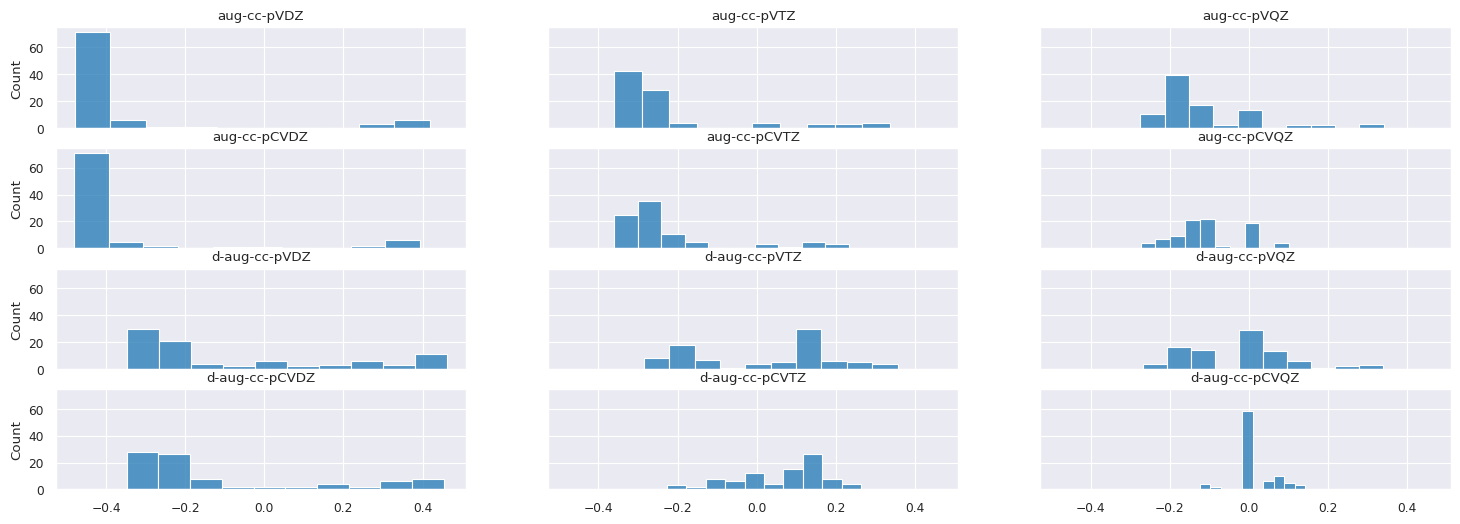

In [70]:
threshold = 5e-2   # threshold for symlog transformation           

quantile = preprocessing.QuantileTransformer(n_quantiles=10)
robust= preprocessing.RobustScaler()
normalizer = preprocessing.Normalizer()
standard= preprocessing.StandardScaler()

data_matrix = data.to_numpy()
# normalize all values to be between +1 and -1 
#data_matrix/=np.max(np.abs(data_matrix))


data_matrix = symlog(data_matrix, threshold)
#data_matrix = quantile.fit_transform(data_matrix)
#data_matrix=standard.fit_transform(data_matrix)
data_matrix = normalizer.fit_transform(data_matrix)


fig, axes = plt.subplots(4, 3, figsize=(18, 6), sharex=True, sharey=True)
for i, ax in enumerate(axes.flat):
    sns.histplot(data_matrix[:, i], ax=ax, kde=False, bins=10)
    ax.set_title(data.columns[i])



def gmm_bic_score(estimator, X):
    return -estimator.bic(X)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END covariance_type=spherical, init_params=kmeans, n_components=1;, score=149.166 total time=   0.4s
[CV 2/5] END covariance_type=spherical, init_params=kmeans, n_components=1;, score=59.400 total time=   0.3s
[CV 3/5] END covariance_type=spherical, init_params=kmeans, n_components=1;, score=58.829 total time=   0.3s
[CV 4/5] END covariance_type=spherical, init_params=kmeans, n_components=1;, score=149.668 total time=   0.1s
[CV 5/5] END covariance_type=spherical, init_params=kmeans, n_components=1;, score=112.202 total time=   0.1s
[CV 1/5] END covariance_type=spherical, init_params=kmeans, n_components=2;, score=294.477 total time=   0.3s
[CV 2/5] END covariance_type=spherical, init_params=kmeans, n_components=2;, score=196.655 total time=   0.5s
[CV 3/5] END covariance_type=spherical, init_params=kmeans, n_components=2;, score=254.554 total time=   0.3s
[CV 4/5] END covariance_type=spherical, init_params=kmeans, n

<Axes: xlabel='Number of components', ylabel='BIC score'>

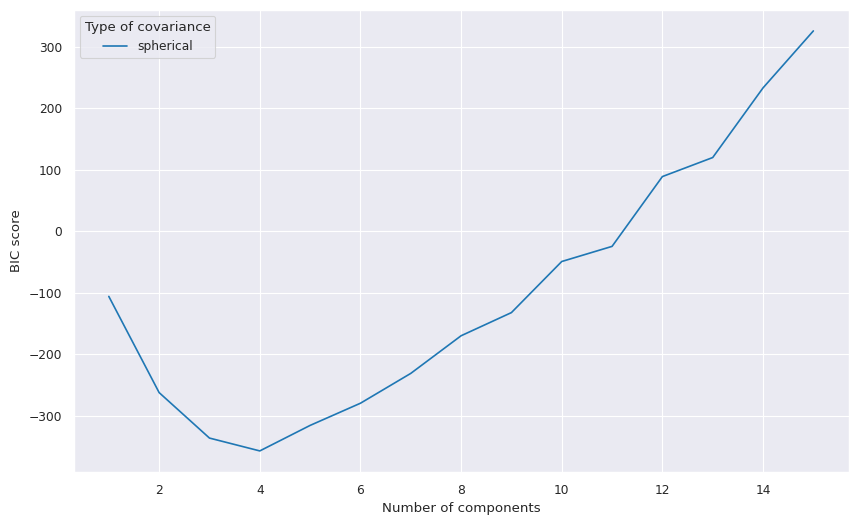

In [71]:
    


param_grid = {
    'n_components': range(1, 16),
    'init_params': ['kmeans'],#'random', 'random_from_data', 'k-means++' ],#
    'covariance_type': ['spherical']
}

grid_search = GridSearchCV(GaussianMixture(tol=threshold,n_init=100,max_iter=2000),
                           param_grid=param_grid, scoring=gmm_bic_score, verbose=3,)
model = grid_search

X = data_matrix
#grid_search.fit(X)
model.fit(X)


df = pd.DataFrame(grid_search.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
df["mean_test_score"] = -df["mean_test_score"]
df = df.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "BIC score",
    }
)

print(grid_search.best_params_)
df.sort_values(by="BIC score").head()

# plot the BIC score for each model
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df, x="Number of components", y="BIC score", hue="Type of covariance", ax=ax)



In [156]:
threshold = 5e-2   # threshold for symlog transformation           

data = get_basis_data(basis_data, 0)[0]
#data= mol_data.T
data.drop(['aug-cc-pV5Z', 'aug-cc-pV6Z', 'd-aug-cc-pV5Z', 'd-aug-cc-pV6Z'], axis=1, inplace=True)
# drop DZ basis sets
#data.drop(['aug-cc-pVDZ', 'd-aug-cc-pVDZ','aug-cc-pCVDZ','d-aug-cc-pCVDZ'], axis=1, inplace=True)
#data.drop(['aug-cc-pVTZ', 'd-aug-cc-pVTZ','aug-cc-pCVTZ','d-aug-cc-pCVTZ'], axis=1, inplace=True)
data.dropna(inplace=True)
normalizer = preprocessing.Normalizer()
standard= preprocessing.StandardScaler()

data_matrix = data.to_numpy()
# normalize all values to be between +1 and -1 
#data_matrix/=np.max(np.abs(data_matrix))


data_matrix = symlog(data_matrix, threshold)
data_matrix = normalizer.fit_transform(data_matrix)

num_clusters=5
model=GaussianMixture(n_components=num_clusters, covariance_type='spherical', tol=1e-9, n_init=200, max_iter=2000, init_params='kmeans',)
model.fit(data_matrix)

labels = model.predict(data_matrix)



color_iter = sns.color_palette("tab10", 2)[::-1]
#labels = gmm.predict(data_matrix)
score = silhouette_score(X, labels, metric='euclidean')
data['cluster'] = labels
print("silhouette score", score)



average_vectors = []
std_vectors = []
for i in range(num_clusters):
    cluster_points = data_matrix[labels == i]
    average_vector = np.mean(cluster_points, axis=0)
    std_vector = np.std(cluster_points, axis=0)
    average_vectors.append(average_vector)
    std_vectors.append(std_vector)

avg_df = pd.DataFrame(average_vectors, )
avg_df['mean'] = avg_df.mean(axis=1)
avg_df = avg_df.sort_values('mean', ascending=False)
avg_df.drop('mean', axis=1, inplace=True)

std_df = pd.DataFrame(std_vectors, )

sorted_index = avg_df.index
std_df = std_df.reindex(sorted_index)
std_df.sort_index(inplace=True)

cluster_map = {sorted_index[i]: i for i in range(len(sorted_index))}
avg_df = avg_df.reset_index(drop=True)
# avg_df = avg_df.apply(lambda x: inv_symlog(x, threshold))
# avg_df = pd.DataFrame(scaler.inverse_transform(avg_df), columns=avg_df.columns,
#                      index=avg_df.index)
print(cluster_map)
data['cluster'] = data['cluster'].map(cluster_map)

iso_diff = basis_data.copy()
iso_diff['cluster'] = iso_diff['molecule'].map(data['cluster'])
iso_diff['cluster'] = iso_diff['cluster'] + 1
iso_diff['cluster'] = iso_diff['cluster'].astype('category')

iso_diff.dropna(inplace=True)



silhouette score 0.35021453741773284
{1: 0, 4: 1, 2: 2, 3: 3, 0: 4}


/tmp/ipykernel_66286/666981847.py:46: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  ax.axhline(y=threshold, linestyle='dashdot', color='red', linewidth=.50)
/tmp/ipykernel_66286/666981847.py:47: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  ax.axhline(y=-threshold, linestyle='dashdot', color='red', linewidth=.50)
/tmp/ipykernel_66286/666981847.py:48: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  ax.axhline(y=.00, linestyle='--', color='red', linewidth=.35)
/tmp/ipykernel_66286/666981847.py:46: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  ax.axhline(y=threshold, linestyle='dashdot', color='red', linewidth=.50

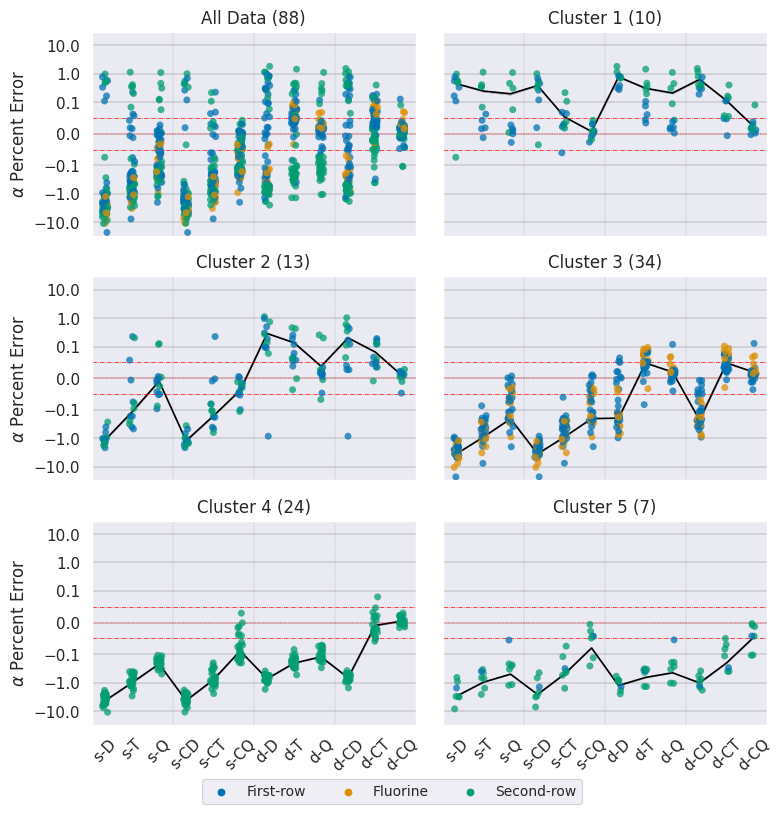

In [157]:
# create the same plot as above but without using a facet grid and just creating a 2 x 4 grid of plots
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

plot_data = iso_diff.query('omega==0')

basis_labels = ['aug-pVDZ', 'aug-pVTZ', 'aug-pVQZ', 'aug-pCVDZ', 'aug-pCVTZ', 'aug-pCVQZ', 'd-aug-pVDZ', 'd-aug-pVTZ', 'd-aug-pVQZ', 'd-aug-pCVDZ',
                'd-aug-pCVTZ', 'd-aug-pCVQZ']
basis_order = ['aug-cc-pVDZ', 'aug-cc-pCVDZ', 'aug-cc-pVTZ', 'aug-cc-pCVTZ', 'aug-cc-pVQZ', 'aug-cc-pCVQZ', 'd-aug-cc-pVDZ', 'd-aug-cc-pCVDZ', 'd-aug-cc-pVTZ',
               'd-aug-cc-pCVTZ', 'd-aug-cc-pVQZ', 'd-aug-cc-pCVQZ']
basis_order = ['aug-cc-pVDZ', 'aug-cc-pVTZ', 'aug-cc-pVQZ', 'aug-cc-pCVDZ', 'aug-cc-pCVTZ', 'aug-cc-pCVQZ', 'd-aug-cc-pVDZ', 'd-aug-cc-pVTZ', 'd-aug-cc-pVQZ',
               'd-aug-cc-pCVDZ', 'd-aug-cc-pCVTZ', 'd-aug-cc-pCVQZ']
basis_labels=['s-D','s-T', 's-Q', 's-CD', 's-CT', 's-CQ', 'd-D', 'd-T', 'd-Q', 'd-CD', 'd-CT', 'd-CQ']
#basis_labels = ['s-D','s-CD', 's-T', 's-CT', 's-Q', 's-CQ', 'd-D', 'd-CD', 'd-T', 'd-CT', 'd-Q', 'd-CQ']

plot_data = plot_data.query('basis!="aug-cc-pV5Z" and basis!="aug-cc-pV6Z" and basis!="d-aug-cc-pV5Z" and basis!="d-aug-cc-pV6Z"')
plot_data['basis'] = plot_data['basis'].astype('category')
plot_data['basis'] = plot_data['basis'].cat.reorder_categories(basis_order)

# remove unused basis sets
sns.set_style('darkgrid')
with sns.plotting_context('paper', font_scale=1.25, ):
    sharey=True
    fig, axes = plt.subplots(3, 2, figsize=(8, 8), sharex=True, sharey=sharey)
    for i, ax in enumerate(axes.flat):
        with sns.axes_style("darkgrid"):
            if i == 0:
                # plot all the cluster in a single plot without cluster labels
                cluster_data = plot_data
                #sns.lineplot(data=cluster_data, x='basis', y='alphaE', ax=ax, color='black', legend=False, hue='mol_system')
                sns.stripplot(data=cluster_data, x='basis', y='alphaE', hue='mol_system', ax=ax, size=5, alpha=.75, dodge=False, palette='colorblind',
                              legend=True)
                cluster_size = plot_data.molecule.unique().size
                ax.set_title(f'All Data ({cluster_size})')
            else:
                cluster_data = plot_data.query('cluster==@i')
                sns.lineplot(data=cluster_data, x='basis', y='alphaE', ax=ax, color='black', legend=False, hue=None,errorbar=('ci',0))
                sns.stripplot(data=cluster_data, x='basis', y='alphaE', hue='mol_system', ax=ax, size=5, alpha=.75, dodge=False, palette='colorblind',
                              legend=False)
                cluster_size = plot_data.query('cluster==@i').molecule.unique().size
                ax.set_title(f'Cluster {i} ({cluster_size})')
            ax.set_xticks(range(0, 12))
            ax.set_xticklabels(basis_labels, rotation=45)

            ax.axhline(y=threshold, linestyle='dashdot', color='red', linewidth=.50)
            ax.axhline(y=-threshold, linestyle='dashdot', color='red', linewidth=.50)
            ax.axhline(y=.00, linestyle='--', color='red', linewidth=.35)

            if sharey:
                ax.set_yscale('symlog', linthresh=.1)
                ax.set_ylim(-30, 30)
                ax.yaxis.set_major_formatter(ScalarFormatter())
            # set background color to grey
            #ax.set_facecolor('lightgrey')

            # set y grid lines only to black
            ax.yaxis.grid(True, color='black', linestyle='-', linewidth=.15)

            # set y limits

            if i % 2 == 0:
                ax.set_ylabel(r'$\alpha$ Percent Error')
            else:
                ax.set_ylabel('')
            ax.set_xlabel('')

            for j in range(3, 12, 3):
                ax.axvline(x=j-.5, linestyle='dotted', color='black', linewidth=.15)

    # create the legend

    handles, labels = axes.flat[0].get_legend_handles_labels()
    # remove the legend from the first plot
    axes.flat[0].legend_.remove()
    fig.legend(handles, labels, loc='center', bbox_to_anchor=(0.5, 0.00), ncol=3, fancybox=True, fontsize=10)

    fig.tight_layout()
    fig.savefig(paper_path.joinpath('alpha_convergence.png'), dpi=600, bbox_inches='tight')
    #ax.legend(loc='center', bbox_to_anchor=(0.5, 1.25), ncol=3, fancybox=True, fontsize=10)



In [158]:


cdata = iso_diff.dropna().query('omega==0 and basis=="aug-cc-pVDZ"')
cluster_table = cdata[['molecule', 'cluster', 'mol_system']].drop_duplicates().sort_values('mol_system')
mol_table = pd.DataFrame()
#mol_table.columns = [f'Cluster {i}' for i in range(1, len(cluster_table['cluster'].unique()))]

cluster_data = []
for cluster_id, group in cluster_table.groupby('cluster'):
    print(cluster_id)
    cs = pd.Series(group['molecule'])
    cs.name = f'Cluster {int(cluster_id)}'
    cs.reset_index(drop=True, inplace=True)
    cluster_data.append(cs)

mol_table = pd.concat(cluster_data, axis=1)
# sort the values of each column alphabetically
mol_table = mol_table.fillna('-')
mol_table = mol_table.applymap(lambda x: '\\ce{' + str(x) + '}', na_action='ignore')
# reverse the order to the table rowwise
mol_table = mol_table.iloc[::-1]
# map colorblind colormap to the columns
mol_only = cluster_table['molecule']
# make mol only into a table 9 x 10 

# surround the values with \ce{} to make them chemical formulas
ms = mol_only.apply(lambda x: r'\ce{' + str(x) + '}')
# make a dictionary of the colors
mol_dict = dict(zip(ms, cluster_table.mol_system))

pal = sns.color_palette('muted', n_colors=3)
colormap = dict(zip(cluster_table.mol_system.unique(), pal.as_hex()))
mol_color = {mol: colormap[mol_dict[mol]] for mol in ms}
# add white to \ce{-} to make it white
mol_color = {mol: colormap[mol_dict[mol]] for mol in ms}

mol_color['\ce{-}'] = 'white'
# apply the colors to the dataframe based on mol_color dictionary

#mol_df = mol_df.applymap(lambda x: '\\ce{' + str(x) + '}')
mol_df = mol_table.style.apply(lambda x: [f'background-color: {mol_color[v]}' for v in x],
                               axis=1)
# before printing surround the values with \ce{} to make them chemical formulas
# adjust column names to be Cluster 1, Cluster 2, etc.
# write the dataframe to a latex table
mol_df.to_latex(paper_path.joinpath('cluster_molecule_table.tex'),
                multicol_align='|c|',
                hrules=True,
                convert_css=True,
                )

mol_df



1.0
2.0
3.0
4.0
5.0


,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5
33,\ce{-},\ce{-},\ce{HCCF},\ce{-},\ce{-}
32,\ce{-},\ce{-},\ce{BF},\ce{-},\ce{-}
31,\ce{-},\ce{-},\ce{FCN},\ce{-},\ce{-}
30,\ce{-},\ce{-},\ce{HF},\ce{-},\ce{-}
29,\ce{-},\ce{-},\ce{FNO},\ce{-},\ce{-}
28,\ce{-},\ce{-},\ce{BH2F},\ce{-},\ce{-}
27,\ce{-},\ce{-},\ce{HOF},\ce{-},\ce{-}
26,\ce{-},\ce{-},\ce{OF2},\ce{-},\ce{-}
25,\ce{-},\ce{-},\ce{NH2F},\ce{-},\ce{-}
24,\ce{-},\ce{-},\ce{F2},\ce{-},\ce{-}
